# Quantum Teleportation:

In [1]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector,array_to_latex
from qiskit.circuit.library import Initialize
from qiskit.quantum_info import random_statevector

Consider any state $|\psi\rangle$. **Alice** wants to send it to **Bob**. $$|\psi\rangle  = \alpha|0\rangle + \beta|1\rangle $$

In [2]:
psi = random_statevector(2)
print("Psi = ",psi)

Psi =  Statevector([-0.39666205+0.75612102j, -0.5041011 -0.12970079j],
            dims=(2,))


In [3]:
array_to_latex(psi)

<IPython.core.display.Latex object>

In [4]:
from qiskit.quantum_info import Statevector
# psi = Statevector.from_label('1')
# psi.draw(output="latex")

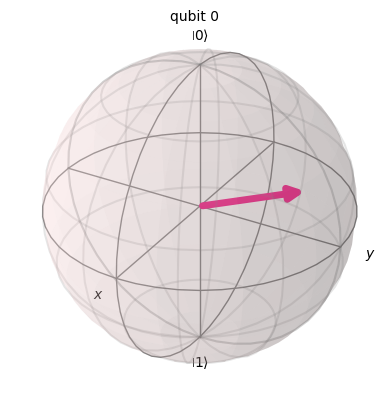

In [5]:
plot_bloch_multivector(psi)

In [6]:
# Create separate quantum registers for alice and bob
qr_init = QuantumRegister(1,'q')
qr_alice = QuantumRegister(1, 'alice')
qr_bob = QuantumRegister(1, 'bob')
c1 = ClassicalRegister(1,name="c1")
c2 = ClassicalRegister(1,name="c2")
qc= QuantumCircuit(qr_init,qr_alice,qr_bob,c1,c2)

/home/cdac/anaconda3/envs/qiskit/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


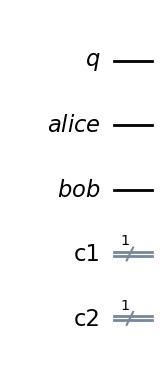

In [7]:
qc.draw("mpl")

Here we have started constructing Quantum Circuit. Now we need to add Initial state to Qubit **q**.

Step-1 creates an input state that is to be teleported. 

In [8]:
# Step-1

init_state =  Initialize(psi)
init_state.label = "Initial-State"

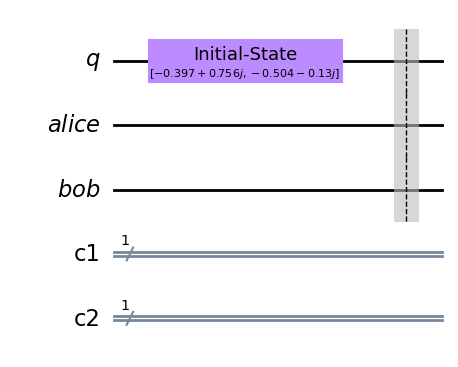

In [9]:
qc.append(init_state,[0])
#qc.x(0)
qc.barrier()
qc.draw("mpl")

In [10]:
# Step-2
def create_bell_pair(qc,a,b):
    qc.h(a)
    qc.cx(a,b)

Now we need to entangle **Alice** and **Bob's** Qubits. For that we are using *hadamard* and *CNOT* gates.

In [11]:
create_bell_pair(qc,1,2)

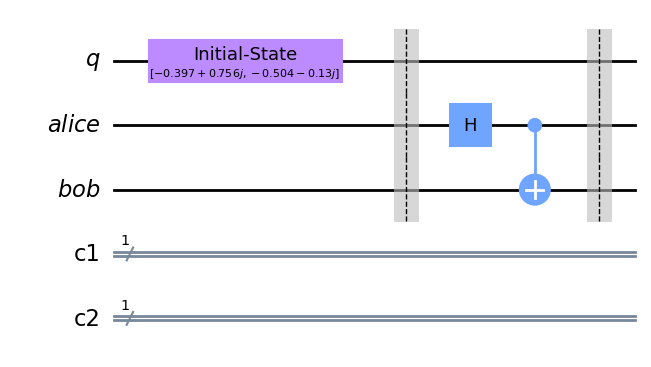

In [12]:
qc.barrier()
qc.draw("mpl")

In [13]:
# Step-3
def alice_gates(qc,psi,a):
    
    qc.cx(psi,a)
    qc.h(psi)
    qc.barrier()

Now in Step-3 Alice performse Reverse EPR operations w.r.t initialzation Qubit.

In [14]:
alice_gates(qc,0,1)

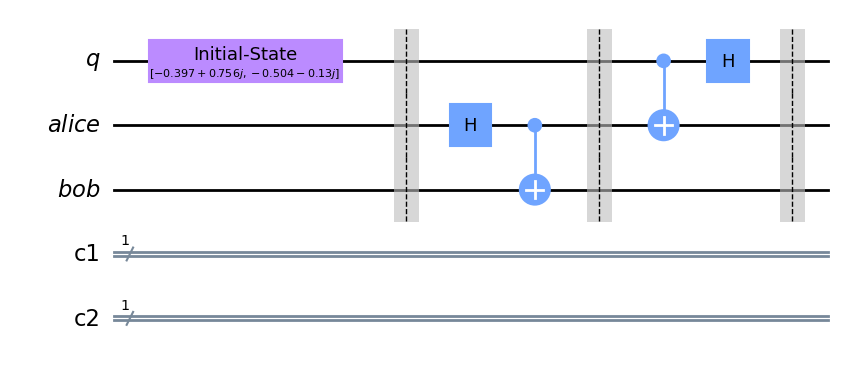

In [15]:
qc.draw("mpl")

In [16]:
#step-4
def alice_measurements(qc,a,b):
    qc.measure(a,0)
    qc.measure(b,1)

In step-4 Alice performs the measurements on her Entangled Qubit and Information carrying Qubit. The results of two measurements are stored in 2 classical bits which will be sent to Bob.

In [17]:
alice_measurements(qc,0,1)

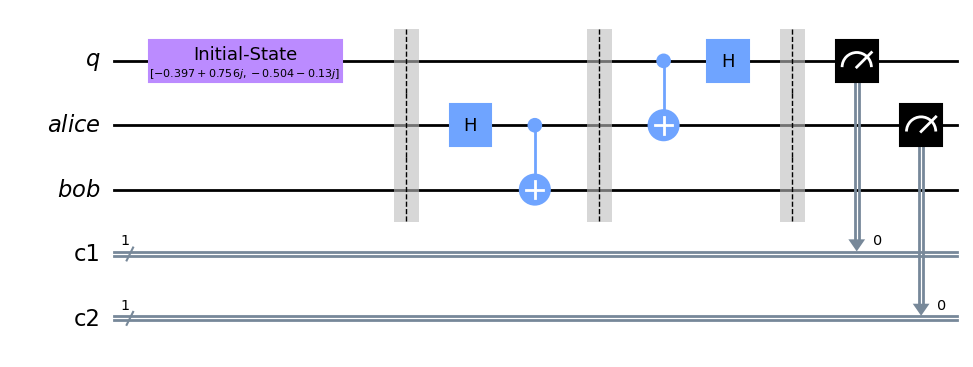

In [18]:
qc.draw("mpl")

In [19]:
#Step-5
def Bob_gates(qc, qubit, c1, c2):
    qc.x(qubit).c_if(c2,1)
    qc.z(qubit).c_if(c1,1)

Here,
- if Alice sends $|00\rangle$, Bob should have got the result as $\alpha|0\rangle+\beta|1\rangle$.
- if Alice sends $|01\rangle$, Bob should have got the result as $\alpha|1\rangle+\beta|0\rangle$.
- if Alice sends $|10\rangle$, Bob should have got the result as $\alpha|0\rangle-\beta|1\rangle$.
- if Alice sends $|11\rangle$, Bob should have got the result as $\alpha|1\rangle-\beta|0\rangle$.

In [20]:
Bob_gates(qc, 2,c1,c2)

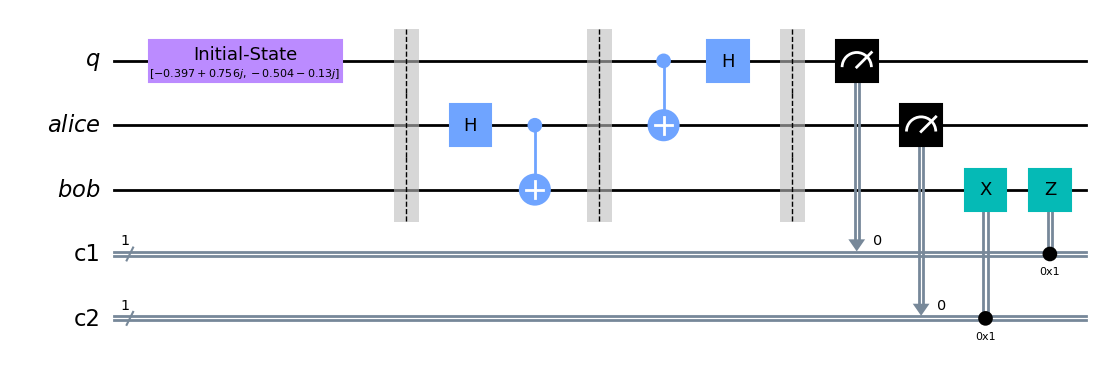

In [21]:
qc.draw("mpl")

Here we also need to apply some unitary gates based on the values Alice sends in order to get exact output.

| Recieved Bits| Result recieved by Bob | Gates to be applied | Result after applying Gates |
|--------------|------------------------|---------------------|-----------------------------|
|00|$\alpha|0\rangle+\beta|1\rangle$|I|$\alpha|0\rangle + \beta|1\rangle$|
|01|$\alpha|1\rangle+\beta|0\rangle$|X|$\alpha|0\rangle + \beta|1\rangle$|
|10|$\alpha|0\rangle-\beta|1\rangle$|Z|$\alpha|0\rangle + \beta|1\rangle$|
|11|$\alpha|1\rangle-\beta|0\rangle$|X&Z|$\alpha|0\rangle + \beta|1\rangle$|

Now let us try to simulate this ckt in state vector simulator

In [22]:
backend = Aer.get_backend("statevector_simulator")
job = backend.run(qc, shots=1000)
result = job.result().get_statevector(qc,decimals=3)
print(result)

Statevector([-0.   +0.j   , -0.397+0.756j,  0.   +0.j   ,  0.   +0.j   ,
             -0.   +0.j   , -0.504-0.13j ,  0.   -0.j   ,  0.   -0.j   ],
            dims=(2, 2, 2))


In [23]:
counts = job.result().get_counts()
print(counts)

{'0 1': 244, '1 1': 259, '1 0': 243, '0 0': 254}


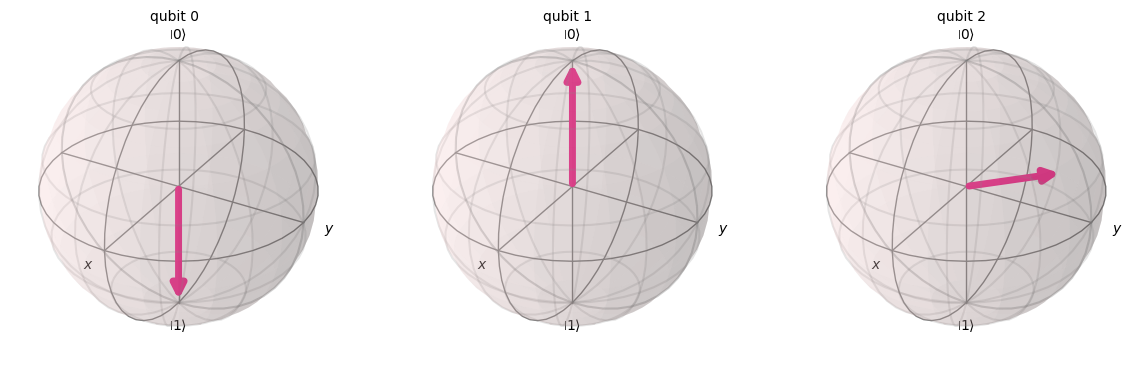

In [24]:
plot_bloch_multivector(result)

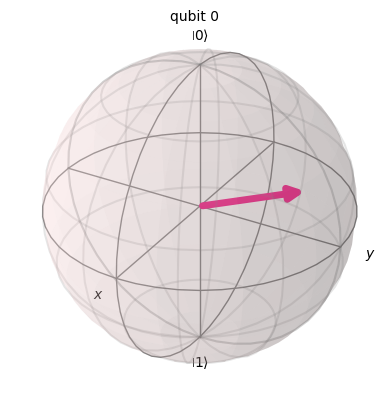

In [25]:
plot_bloch_multivector(psi)

In [26]:
print("Psi = ",psi)

Psi =  Statevector([-0.39666205+0.75612102j, -0.5041011 -0.12970079j],
            dims=(2,))


In [27]:
array_to_latex(psi)

<IPython.core.display.Latex object>

In [28]:
psi_latex =  Statevector(psi)
psi_latex.draw(output="latex")

<IPython.core.display.Latex object>

In [29]:
print(result)

Statevector([-0.   +0.j   , -0.397+0.756j,  0.   +0.j   ,  0.   +0.j   ,
             -0.   +0.j   , -0.504-0.13j ,  0.   -0.j   ,  0.   -0.j   ],
            dims=(2, 2, 2))


In [30]:
array_to_latex(result)

<IPython.core.display.Latex object>

In [31]:
result_latex =  Statevector(result)
result_latex.draw(output="latex")

<IPython.core.display.Latex object>